In [1]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 487.6 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.6 MB 1.3 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.6 MB 1.6 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.6 MB 1.7 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.6 MB 1.9 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.6 MB 1.9 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.6 MB 2.1 MB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.6 MB 2.1 MB/s eta 0:00:01
   ---------------------- ----------------- 0.9/1.6 MB 2.1 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.6 MB 2.2 MB/s eta 0:00:01
   ---------------------------- ----------- 1.2/1.6 MB 2.2 MB/s eta 0:00:01
   ---------------------


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     -------------- ------------------------- 20.5/57.6 kB ? eta -:--:--
     -------------- ------------------------- 20.5/57.6 kB ? eta -:--:--
     -------------------------------------- 57.6/57.6 kB 434.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ------------------------------------ --- 71.7/78.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 78.3/78.3 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

## Generating graph

In [4]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(0, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

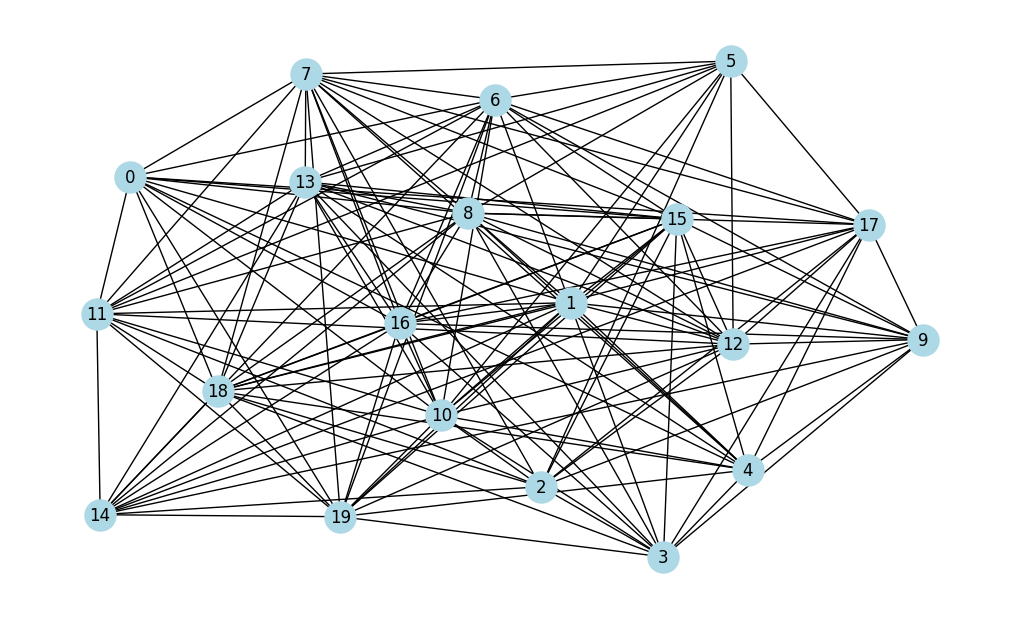

In [33]:
G = gnp_random_connected_graph(20, 0.7, False, True)

# For Task 1

## Kruskal's algorithm

In [34]:
from networkx.algorithms import tree

In [35]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")
print(mstk)
kruskal1 = mstk

Graph with 20 nodes and 19 edges


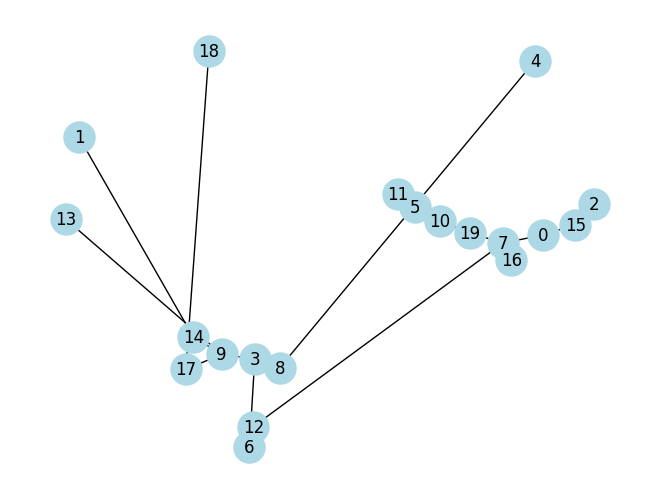

In [36]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [37]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 7), (0, 15), (1, 14), (2, 15), (3, 6), (3, 8), (3, 9), (4, 8), (5, 10), (5, 11), (6, 12), (7, 12), (7, 16), (7, 19), (9, 13), (9, 14), (9, 17), (10, 19), (17, 18)]),
 19)

Our implementation of Kruskal algoritm

In [50]:
def find_set(node, sets, s_edges_i):
    for j, jth in enumerate(sets):
        if s_edges_i[node] in sets[j]:
            return jth
def Kruskal(graph):
    sum_of_weights = 0
    edges = list(graph.edges(data=True))
    s_edges = sorted(edges, key= lambda x : x[2]['weight'])
    sets = [set([x]) for x in range(len(graph.nodes))]
    res = []
    for i, ith in enumerate(s_edges):
        u = find_set(0, sets, s_edges[i])
        v = find_set(1, sets, s_edges[i])
        if u != v:
            res.append(ith[:2])
            sum_of_weights += ith[2]['weight']
            sets[sets.index(u)] = u.union(v)
            sets.remove(v)
    return res, sum_of_weights

In [51]:
print(Kruskal(G))

([(1, 14), (3, 6), (4, 8), (7, 12), (9, 13), (17, 18), (2, 15), (9, 14), (9, 17), (0, 7), (0, 15), (3, 8), (3, 9), (6, 12), (5, 10), (5, 11), (7, 16), (7, 19), (10, 19)], 28)


## Prim's algorithm

In [41]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")
prim1 = mstp

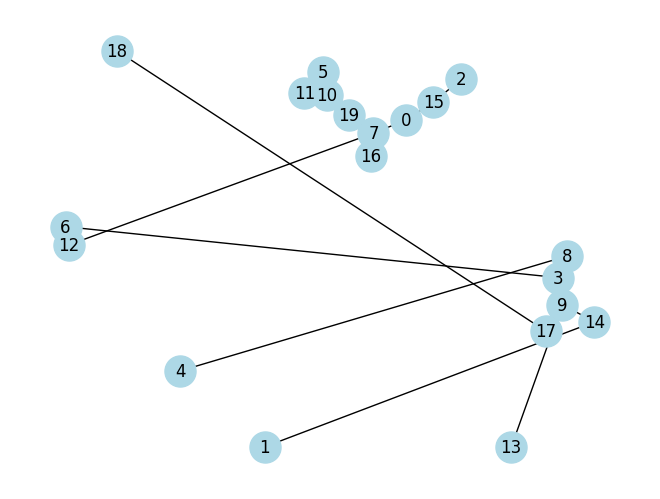

In [42]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [49]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 7), (0, 15), (1, 14), (2, 15), (3, 6), (3, 8), (3, 9), (4, 8), (5, 10), (6, 12), (7, 12), (7, 16), (7, 19), (9, 13), (9, 14), (9, 17), (10, 19), (10, 11), (17, 18)]),
 19)

Our implementation

In [43]:
def Prima_algoritm(graph: 'nx.Graph') -> tuple[list[tuple], int]:
    spanning_tree = []
    sum_of_weights = 0
    list_of_nodes = list(graph.nodes)
    start = list_of_nodes[0]
    seen = set([start])
    list_of_nodes.remove(start)
    while list_of_nodes:
        lst = []
        for node in seen:
            for neighbour in graph.adj[node]:
                if neighbour not in seen:
                    lst.append((node, neighbour, graph.edges[node, neighbour]['weight']))
        node1, node2, weight = min(lst, key = lambda x: x[2])
        spanning_tree.append((node1, node2))
        seen.add(node2)
        sum_of_weights += weight
        list_of_nodes.remove(node2)
    return spanning_tree, sum_of_weights


In [48]:
print(Prima_algoritm(G))

([(0, 7), (7, 12), (0, 15), (15, 2), (12, 6), (6, 3), (3, 8), (8, 4), (3, 9), (9, 13), (9, 14), (14, 1), (9, 17), (17, 18), (7, 16), (7, 19), (19, 10), (10, 5), (5, 11)], 28)


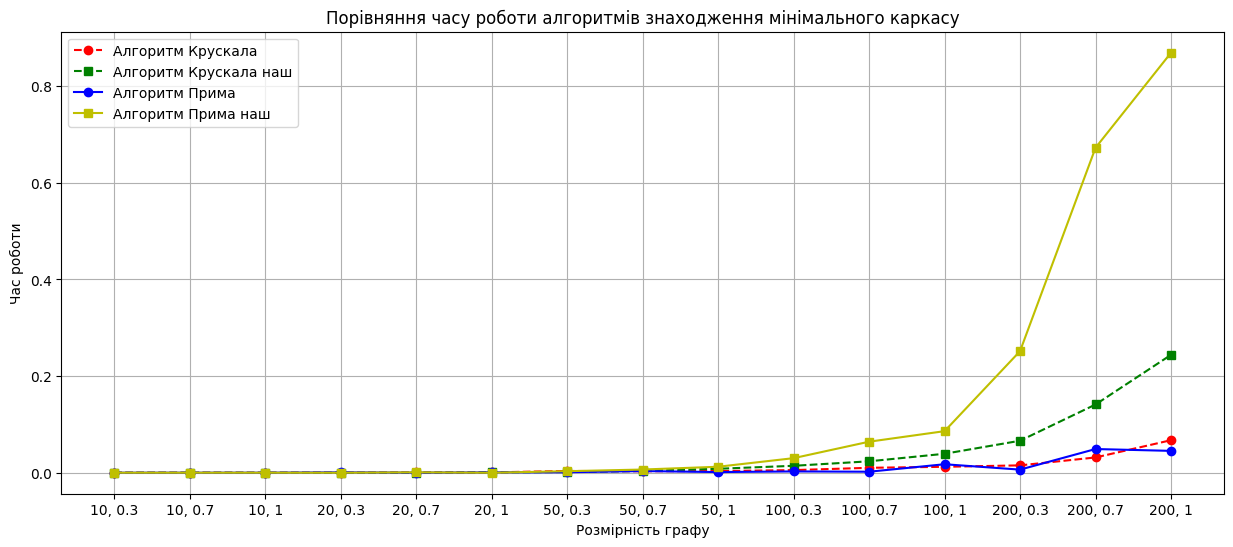

In [28]:
graph_sizes = ['10, 0.3', '10, 0.7', '10, 1', '20, 0.3', '20, 0.7', '20, 1', '50, 0.3', '50, 0.7', '50, 1', '100, 0.3', '100, 0.7', '100, 1', '200, 0.3', '200, 0.7', '200, 1']

time_defaul_kruskal = [0.0, 0.0, 0.0, 0.0, 0.0005470752716064453, 0.0006850957870483398, 0.0036418914794921877, 0.0030240297317504885, 0.0034366846084594727, 0.005407023429870606, 0.010188817977905273, 0.012246203422546387, 0.015219664573669434, 0.031615185737609866, 0.06730475425720214]
time_our_kruskal=[1.888275146484375e-05, 1.888275146484375e-05, 1.888275146484375e-05, 1.888275146484375e-05, 1.888275146484375e-05, 0.0008579492568969727, 0.0014426231384277344, 0.0037295341491699217, 0.008184313774108887, 0.014316654205322266, 0.023598694801330568, 0.039208054542541504, 0.06618421077728272, 0.14116311073303223, 0.2439647674560547]
time_default_prim = [0.0, 0.0, 0.0, 0.0008033037185668946, 0.00011892318725585938, 0.000800466537475586, 0.0010152339935302734, 0.0034523487091064455, 0.001352238655090332, 0.0026825666427612305, 0.0020777225494384766, 0.017531490325927733, 0.006429624557495117, 0.049019575119018555, 0.045213627815246585]
time_our_prim = [0.0, 0.0, 0.0, 0.0, 0.0008027076721191407, 0.0, 0.0031490325927734375, 0.006591153144836426, 0.012360405921936036, 0.030137038230895995, 0.06417696475982666, 0.08600368499755859, 0.2515445947647095, 0.6724663972854614, 0.8690344810485839]

plt.figure(figsize=(15, 6))

plt.plot(graph_sizes, time_defaul_kruskal, label='Алгоритм Крускала', marker='o', linestyle='--', color='r')
plt.plot(graph_sizes, time_our_kruskal, label='Алгоритм Крускала наш', marker='s', linestyle='--', color='g')
plt.plot(graph_sizes, time_default_prim, label='Алгоритм Прима', marker='o', linestyle='-', color='b')
plt.plot(graph_sizes, time_our_prim, label='Алгоритм Прима наш', marker='s', linestyle='-', color='y')

plt.title('Порівняння часу роботи алгоритмів знаходження мінімального каркасу')
plt.xlabel('Розмірність графу')
plt.ylabel('Час роботи')

plt.legend(loc='upper left')
plt.grid(True)

plt.show()

Результати для менших значень не точно видно, тому нижче представлені графіки для кращого розуміння

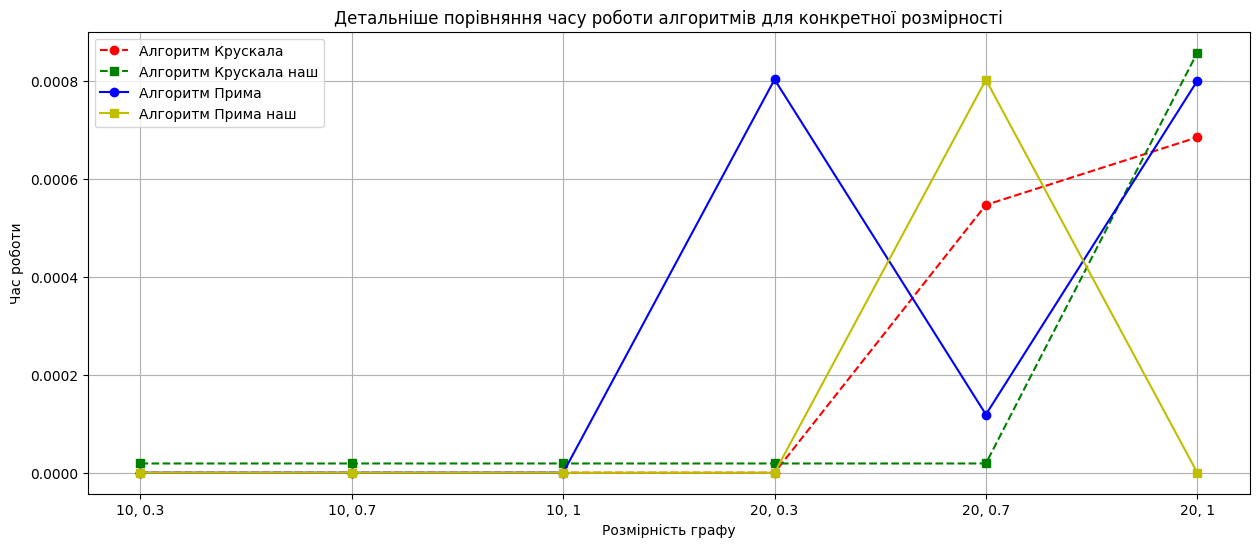

In [29]:
graph_sizes = ['10, 0.3', '10, 0.7', '10, 1', '20, 0.3', '20, 0.7', '20, 1']

time_defaul_kruskal = [0.0, 0.0, 0.0, 0.0, 0.0005470752716064453, 0.0006850957870483398]
time_our_kruskal = [1.888275146484375e-05, 1.888275146484375e-05, 1.888275146484375e-05, 1.888275146484375e-05, 1.888275146484375e-05, 0.000857949256896972]
time_default_prim = [0.0, 0.0, 0.0, 0.0008033037185668946, 0.00011892318725585938, 0.000800466537475586]
time_our_prim = [0.0, 0.0, 0.0, 0.0, 0.0008027076721191407, 0.0]

plt.figure(figsize=(15, 6))

plt.plot(graph_sizes, time_defaul_kruskal, label='Алгоритм Крускала', marker='o', linestyle='--', color='r')
plt.plot(graph_sizes, time_our_kruskal, label='Алгоритм Крускала наш', marker='s', linestyle='--', color='g')
plt.plot(graph_sizes, time_default_prim, label='Алгоритм Прима', marker='o', linestyle='-', color='b')
plt.plot(graph_sizes, time_our_prim, label='Алгоритм Прима наш', marker='s', linestyle='-', color='y')

plt.title('Детальніше порівняння часу роботи алгоритмів для конкретної розмірності')
plt.xlabel('Розмірність графу')
plt.ylabel('Час роботи')

plt.legend(loc='upper left')
plt.grid(True)

plt.show()


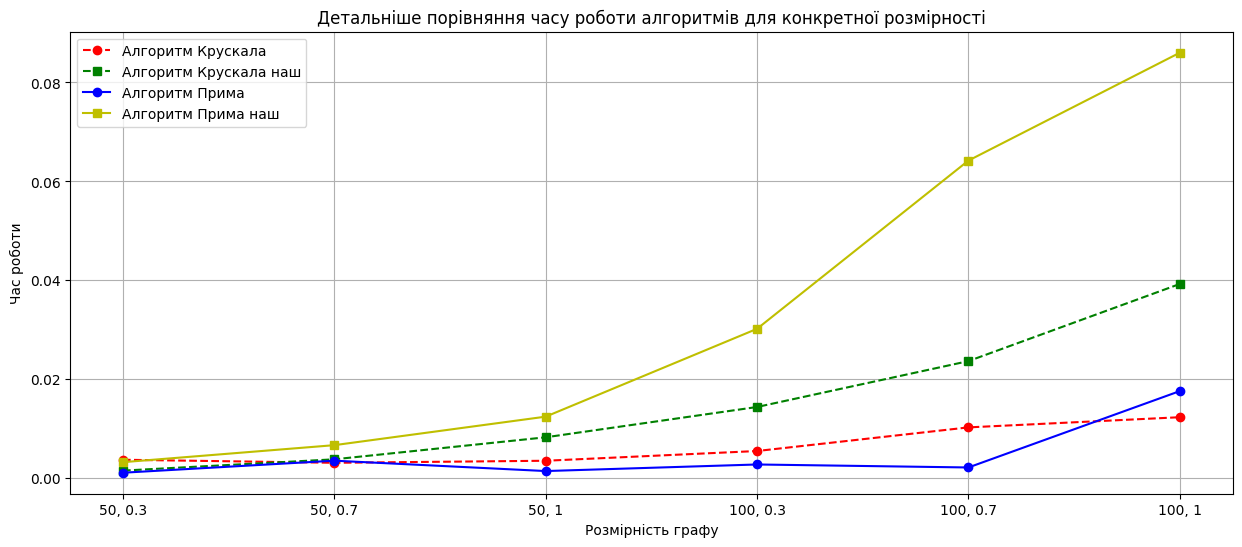

In [30]:
graph_sizes = ['50, 0.3', '50, 0.7', '50, 1', '100, 0.3', '100, 0.7', '100, 1']

time_defaul_kruskal = [0.0036418914794921877, 0.0030240297317504885, 0.0034366846084594727, 0.005407023429870606, 0.010188817977905273, 0.012246203422546387]
time_our_kruskal=[0.0014426231384277344, 0.0037295341491699217, 0.008184313774108887, 0.014316654205322266, 0.023598694801330568, 0.039208054542541504]
time_default_prim = [0.0010152339935302734, 0.0034523487091064455, 0.001352238655090332, 0.0026825666427612305, 0.0020777225494384766, 0.017531490325927733]
time_our_prim = [0.0031490325927734375, 0.006591153144836426, 0.012360405921936036, 0.030137038230895995, 0.06417696475982666, 0.08600368499755859]
plt.figure(figsize=(15, 6))

plt.plot(graph_sizes, time_defaul_kruskal, label='Алгоритм Крускала', marker='o', linestyle='--', color='r')
plt.plot(graph_sizes, time_our_kruskal, label='Алгоритм Крускала наш', marker='s', linestyle='--', color='g')
plt.plot(graph_sizes, time_default_prim, label='Алгоритм Прима', marker='o', linestyle='-', color='b')
plt.plot(graph_sizes, time_our_prim, label='Алгоритм Прима наш', marker='s', linestyle='-', color='y')

plt.title('Детальніше порівняння часу роботи алгоритмів для конкретної розмірності')
plt.xlabel('Розмірність графу')
plt.ylabel('Час роботи')

plt.legend(loc='upper left')
plt.grid(True)

plt.show()

# For Task 2

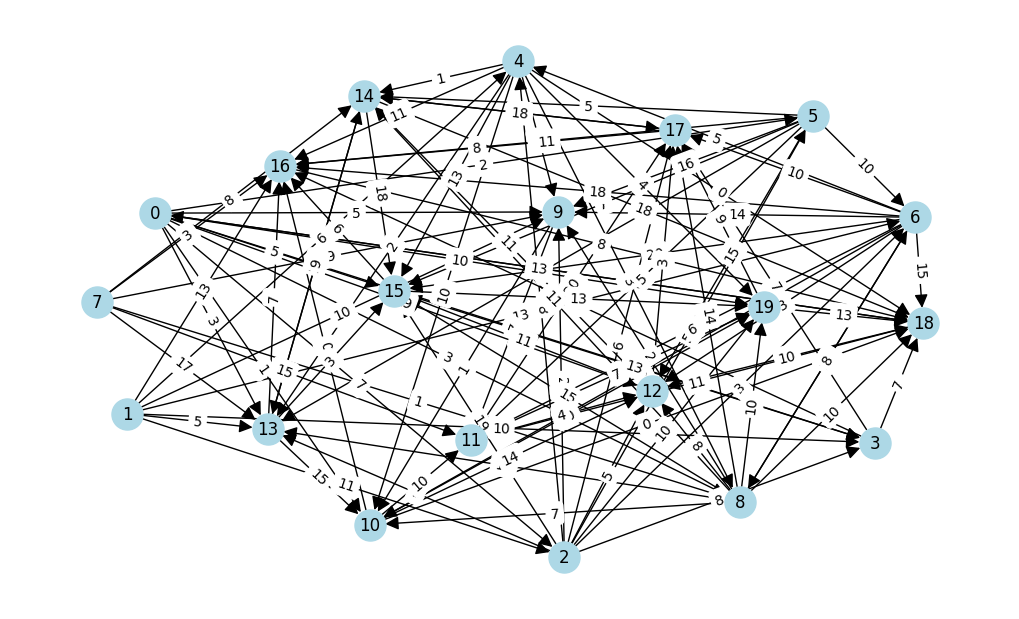

In [7]:
G = gnp_random_connected_graph(20, 0.5, True, True)

In [38]:
list(G.edges())

[(0, 1),
 (0, 2),
 (0, 5),
 (0, 7),
 (0, 9),
 (0, 14),
 (0, 19),
 (1, 4),
 (1, 6),
 (1, 8),
 (1, 10),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 16),
 (2, 19),
 (3, 14),
 (3, 4),
 (3, 5),
 (3, 8),
 (3, 11),
 (3, 12),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (4, 6),
 (4, 7),
 (4, 9),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 18),
 (4, 19),
 (5, 0),
 (5, 13),
 (5, 11),
 (5, 15),
 (5, 16),
 (5, 17),
 (6, 7),
 (6, 10),
 (6, 12),
 (6, 13),
 (6, 15),
 (7, 9),
 (7, 10),
 (7, 11),
 (7, 12),
 (7, 13),
 (7, 17),
 (8, 16),
 (8, 11),
 (8, 13),
 (8, 14),
 (8, 17),
 (8, 18),
 (9, 11),
 (9, 12),
 (9, 18),
 (9, 19),
 (10, 17),
 (10, 15),
 (11, 13),
 (11, 12),
 (11, 15),
 (11, 17),
 (12, 14),
 (12, 15),
 (12, 16),
 (12, 19),
 (13, 14),
 (13, 15),
 (13, 17),
 (14, 17),
 (14, 15),
 (14, 16),
 (14, 19),
 (15, 4),
 (15, 17),
 (15, 19),
 (16, 1),
 (16, 6),
 (16, 18),
 (16, 17),
 (18, 17),
 (18, 19),
 (19, 2),
 (19, 13),
 (19, 18)]

## Bellman-Ford algorithm

In [8]:
from networkx.algorithms import bellman_ford_predecessor_and_distance

In [9]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
    print(pred)
except:
    print("Negative cycle detected")
dist1 = dist

Distance to 0: 0
Distance to 2: 7
Distance to 3: 3
Distance to 5: 2
Distance to 8: 3
Distance to 9: 5
Distance to 10: 1
Distance to 12: 11
Distance to 13: 3
Distance to 15: 5
Distance to 18: 1
Distance to 19: 10
Distance to 4: 15
Distance to 6: 10
Distance to 17: 10
Distance to 16: 1
Distance to 11: 7
Distance to 14: 7
{0: [], 2: [0], 3: [0], 5: [0], 8: [0], 9: [0, 8], 10: [0], 12: [8, 18, 11], 13: [0], 15: [0], 18: [10], 19: [0], 4: [2, 6], 6: [2], 17: [3], 16: [10], 11: [5], 14: [5]}


Our implementation

In [10]:

def Bellman_Ford_algorithm(graph: nx.DiGraph, source):
    list_of_ver = list(graph.nodes())
    list_of_edges = list(graph.edges())
    distance = {ver: float('inf') if ver != source else 0 for ver in list(graph.nodes())}
    predecessor = {ver: None for ver in list_of_ver}
    for i in range(1, len(list_of_ver)):
        for u, v in list_of_edges:
            new_value = distance[u] + graph.edges()[u, v]['weight']
            if distance[u] + graph.edges()[u, v]['weight'] < distance[v]:
                distance[v] = new_value
                predecessor[v] = u
    for u, v in list_of_edges:
        if distance[u] + graph.edges()[u, v]['weight'] < distance[v]:
            raise ValueError("Negative cycle detected")
    return predecessor, distance

pred, dist2 = Bellman_Ford_algorithm(G, 0)
for k, v in dist2.items():
    print(f"Distance to {k}:", v)
print(pred)

Distance to 0: 0
Distance to 1: inf
Distance to 2: 7
Distance to 3: 3
Distance to 4: 15
Distance to 5: 2
Distance to 6: 10
Distance to 7: inf
Distance to 8: 3
Distance to 9: 5
Distance to 10: 1
Distance to 11: 7
Distance to 12: 11
Distance to 13: 3
Distance to 14: 7
Distance to 15: 5
Distance to 16: 1
Distance to 17: 10
Distance to 18: 1
Distance to 19: 10
{0: None, 1: None, 2: 0, 3: 0, 4: 2, 5: 0, 6: 2, 7: None, 8: 0, 9: 0, 10: 0, 11: 5, 12: 8, 13: 0, 14: 5, 15: 0, 16: 10, 17: 3, 18: 10, 19: 0}


In [41]:
print(dist2)

{0: 0, 1: 12, 2: 1, 3: 14, 4: 15, 5: 8, 6: 13, 7: 11, 8: 14, 9: 0, 10: 15, 11: 4, 12: 6, 13: 1, 14: 3, 15: 6, 16: 6, 17: 3, 18: 12, 19: 4}


## Floyd-Warshall algorithm

In [11]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance

In [12]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G) 
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
    # print(pred)
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 2: 7, 3: 3, 5: 2, 8: 3, 9: 5, 10: 1, 12: 11, 13: 3, 15: 5, 18: 1, 19: 10, 1: inf, 4: 15, 6: 10, 7: inf, 11: 7, 14: 7, 16: 1, 17: 10}
Distances with 1 source: {1: 0, 9: 10, 2: 11, 3: 10, 4: 6, 6: 13, 13: 5, 16: 11, 0: 19, 5: 16, 7: inf, 8: 9, 10: 11, 11: 17, 12: 16, 14: 7, 15: 8, 17: 17, 18: 6, 19: 10}
Distances with 2 source: {2: 0, 19: 10, 3: 8, 4: 8, 5: 5, 6: 3, 9: 13, 12: 5, 13: 3, 15: 6, 17: 6, 0: 21, 1: inf, 7: inf, 8: 11, 10: 12, 11: 9, 14: 9, 16: 9, 18: 8}
Distances with 3 source: {3: 0, 16: 1, 17: 7, 18: 7, 0: 20, 1: inf, 2: 27, 4: 35, 5: 22, 6: 30, 7: inf, 8: 23, 9: 25, 10: 21, 11: 27, 12: 17, 13: 23, 14: 25, 15: 25, 19: 30}
Distances with 4 source: {4: 0, 8: 3, 9: 5, 10: 6, 13: 2, 14: 1, 15: 5, 16: 6, 18: 0, 19: 4, 0: 13, 1: inf, 2: 20, 3: 16, 5: 15, 6: 11, 7: inf, 11: 12, 12: 10, 17: 13}
Distances with 5 source: {5: 0, 6: 10, 9: 16, 11: 5, 12: 9, 13: 3, 14: 5, 15: 6, 16: 10, 0: 28, 1: inf, 2: 35, 3: 19, 4: 15, 7: inf, 8: 18, 10: 17, 17: 12, 18

Our implementation

In [13]:
from math import inf
from copy import deepcopy

In [14]:
def floyd_warshall_algorytm(graph: 'nx.Graph'):
    num_of_nodes = len(graph.nodes())
    list_of_edges = list(graph.edges())
    matrix_of_distances = {i: {j: graph.edges[i, j]['weight'] \
            if (i, j) in list_of_edges else 0 if i == j else inf for j in range(num_of_nodes)} \
            for i in range(num_of_nodes)}
    matrix_of_predecessors = {i: {j: i if i!=j else 0 for j in range(num_of_nodes)} \
            for i in range(num_of_nodes)}
    for k in range(0, num_of_nodes):
        matrix_k = deepcopy(matrix_of_distances)
        for i in range(num_of_nodes):
            for j in range(num_of_nodes):
                matrix_k[i][j] = min(matrix_of_distances[i][j], \
                            matrix_of_distances[i][k] + matrix_of_distances[k][j])
                if matrix_k[i][j] != matrix_of_distances[i][j]:
                    matrix_of_predecessors[i][j] = matrix_of_predecessors[k][j]
        matrix_of_distances = matrix_k
    if any(matrix_of_distances[n][n] < 0 for n in range(len(matrix_of_distances))):
        raise ValueError('Negative cycle detected')
    return matrix_of_predecessors, matrix_of_distances


In [15]:
pred1, dist1 = floyd_warshall_algorytm(G) 
for k, v in dist1.items():
    print(f"Distances with {k} source:", dict(v))
print(pred1)

Distances with 0 source: {0: 0, 1: inf, 2: 7, 3: 3, 4: 15, 5: 2, 6: 10, 7: inf, 8: 3, 9: 5, 10: 1, 11: 7, 12: 11, 13: 3, 14: 7, 15: 5, 16: 1, 17: 10, 18: 1, 19: 10}
Distances with 1 source: {0: 19, 1: 0, 2: 11, 3: 10, 4: 6, 5: 16, 6: 13, 7: inf, 8: 9, 9: 10, 10: 11, 11: 17, 12: 16, 13: 5, 14: 7, 15: 8, 16: 11, 17: 17, 18: 6, 19: 10}
Distances with 2 source: {0: 21, 1: inf, 2: 0, 3: 8, 4: 8, 5: 5, 6: 3, 7: inf, 8: 11, 9: 13, 10: 12, 11: 9, 12: 5, 13: 3, 14: 9, 15: 6, 16: 9, 17: 6, 18: 8, 19: 10}
Distances with 3 source: {0: 20, 1: inf, 2: 27, 3: 0, 4: 35, 5: 22, 6: 30, 7: inf, 8: 23, 9: 25, 10: 21, 11: 27, 12: 17, 13: 23, 14: 25, 15: 25, 16: 1, 17: 7, 18: 7, 19: 30}
Distances with 4 source: {0: 13, 1: inf, 2: 20, 3: 16, 4: 0, 5: 15, 6: 11, 7: inf, 8: 3, 9: 5, 10: 6, 11: 12, 12: 10, 13: 2, 14: 1, 15: 5, 16: 6, 17: 13, 18: 0, 19: 4}
Distances with 5 source: {0: 28, 1: inf, 2: 35, 3: 19, 4: 15, 5: 0, 6: 10, 7: inf, 8: 18, 9: 16, 10: 17, 11: 5, 12: 9, 13: 3, 14: 5, 15: 6, 16: 10, 17: 12, 18

## Some useful explanations

### How to get list of edges for your algorithm

In [11]:
edges = list(G.edges()) # by default G.edges are EdgesView class

In [16]:
edges[:5]
[G.edges[0, n]['weight'] for n in G.neighbors(0)]

[1, 9]

### To get edges with weights

In [48]:
edges = list(G.edges(data=True))

In [49]:
edges[:5]

[(0, 2, {'weight': 17}),
 (0, 5, {'weight': 19}),
 (0, 6, {'weight': 8}),
 (0, 7, {'weight': 17}),
 (0, 8, {'weight': -5})]

In [50]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [12]:
import time
from tqdm import tqdm

In [52]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)
    
    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()
    
    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

  0%|          | 0/1000 [00:00<?, ?it/s]

0.00309446382522583

In [26]:
NUM_OF_ITERATIONS = 10
time_taken = 0
lst = []
for nodes in [10, 20, 50, 100, 200, 500]:
    for completeness in [0.3, 0.7, 1]:
        for i in tqdm(range(NUM_OF_ITERATIONS)):
            # note that we should not measure time of graph creation
            G = gnp_random_connected_graph(nodes, completeness, False)
            
            start = time.time()
            Kruskal(G)
            end = time.time()
            
            time_taken += end - start
        lst.append(time_taken / NUM_OF_ITERATIONS)

100%|██████████| 10/10 [00:13<00:00,  1.33s/it]


In [27]:
print(lst)

[1.888275146484375e-05, 1.888275146484375e-05, 1.888275146484375e-05, 1.888275146484375e-05, 1.888275146484375e-05, 0.0008579492568969727, 0.0014426231384277344, 0.0037295341491699217, 0.008184313774108887, 0.014316654205322266, 0.023598694801330568, 0.039208054542541504, 0.06618421077728272, 0.14116311073303223, 0.2439647674560547, 0.5447635412216186, 1.2010294675827027, 2.160506820678711]


Measuring execution time of Kruskal and Prim algorithms

In [25]:
NUM_OF_ITERATIONS = 10
time_kruskal = []
time_kruskal_our = []
time_prim = []
time_prim_our = []
for nodes in [10, 20, 50, 100, 200, 500]:
    for completeness in [0.3, 0.7, 1]:
        time_taken1 = 0
        time_taken2 = 0
        time_taken3 = 0
        time_taken4 = 0
        for i in tqdm(range(NUM_OF_ITERATIONS)):
            
            G = gnp_random_connected_graph(nodes, completeness, False)
            
            start = time.time()
            tree.minimum_spanning_tree(G, algorithm="kruskal")
            end = time.time()
            time_taken1 += end - start

            start = time.time()
            Kruskal(G)
            end = time.time()
            time_taken2 += end - start

            start = time.time()
            tree.minimum_spanning_tree(G, algorithm="prim")
            end = time.time()
            time_taken3 += end - start

            start = time.time()
            Prima_algoritm(G)
            end = time.time()
            time_taken4 += end - start

        time_kruskal.append(time_taken1 / NUM_OF_ITERATIONS)
        time_kruskal_our.append(time_taken2 / NUM_OF_ITERATIONS)
        time_prim.append(time_taken3 / NUM_OF_ITERATIONS)
        time_prim_our.append(time_taken4 / NUM_OF_ITERATIONS)

print(time_kruskal)
print(time_kruskal_our)
print(time_prim)
print(time_prim_our)

100%|██████████| 10/10 [11:50<00:00, 71.06s/it]

[0.0, 0.0, 0.0, 0.0, 0.0005470752716064453, 0.0006850957870483398, 0.0036418914794921877, 0.0030240297317504885, 0.0034366846084594727, 0.005407023429870606, 0.010188817977905273, 0.012246203422546387, 0.015219664573669434, 0.031615185737609866, 0.06730475425720214, 0.14738821983337402, 0.3119134187698364, 0.3901470422744751]
[0.0, 0.0005103826522827148, 0.0004787921905517578, 0.0008241176605224609, 0.0018297672271728516, 0.00035984516143798827, 0.0061386823654174805, 0.011594104766845702, 0.014452695846557617, 0.04683096408843994, 0.12048575878143311, 0.16255652904510498, 0.4759567975997925, 1.560711145401001, 2.062078285217285, 12.403025388717651, 31.25223250389099, 45.14918112754822]
[0.0, 0.0, 0.0, 0.0008033037185668946, 0.00011892318725585938, 0.000800466537475586, 0.0010152339935302734, 0.0034523487091064455, 0.001352238655090332, 0.0026825666427612305, 0.0020777225494384766, 0.017531490325927733, 0.006429624557495117, 0.049019575119018555, 0.045213627815246585, 0.073456287384033

Measuring execution time of Floyd-Warshall and Bellman-Fird algorithms

In [26]:
NUM_OF_ITERATIONS = 10
time_bellman_ford = []
time_bellman_ford_our = []
time_floyd_warshal = []
time_floyd_warshal_our = []
for nodes in [10, 20, 50, 100, 200]:
    for completeness in [0.3, 0.7, 1]:
        time_taken1 = 0
        time_taken2 = 0
        time_taken3 = 0
        time_taken4 = 0
        for i in tqdm(range(NUM_OF_ITERATIONS)):
            
# note that we should not measure time of graph creation
            G = gnp_random_connected_graph(nodes, completeness, True)
            
            start = time.time()
            bellman_ford_predecessor_and_distance(G, 0)
            end = time.time()
            time_taken1 += end - start

            start = time.time()
            Bellman_Ford_algorithm(G, 0)
            end = time.time()
            time_taken2 += end - start

            start = time.time()
            floyd_warshall_predecessor_and_distance(G)
            end = time.time()
            time_taken3 += end - start

            start = time.time()
            floyd_warshall_algorytm(G)
            end = time.time()
            time_taken4 += end - start

        time_bellman_ford.append(time_taken1 / NUM_OF_ITERATIONS)
        time_bellman_ford_our.append(time_taken2 / NUM_OF_ITERATIONS)
        time_floyd_warshal.append(time_taken3 / NUM_OF_ITERATIONS)
        time_floyd_warshal_our.append(time_taken4 / NUM_OF_ITERATIONS)

print(time_bellman_ford)
print(time_bellman_ford_our)
print(time_floyd_warshal)
print(time_floyd_warshal_our)

100%|██████████| 10/10 [00:00<00:00, 327.32it/s]


100%|██████████| 10/10 [03:55<00:00, 23.53s/it]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018622875213623047, 0.0012682199478149414, 0.0014104843139648438, 0.0033634662628173827, 0.007087135314941406, 0.005249333381652832, 0.008532071113586425, 0.0072617769241333004]
[0.0007905006408691406, 0.0006521224975585937, 0.00022451877593994142, 0.0015857219696044922, 0.0014809846878051757, 0.0, 0.020696234703063966, 0.04699692726135254, 0.07062702178955078, 0.15735390186309814, 0.67201669216156, 1.2413896560668944, 2.016827845573425, 4.482198739051819, 3.8108800649642944]
[0.0004032135009765625, 0.0, 0.0, 0.0015225648880004884, 0.0010645151138305663, 0.0008591413497924805, 0.01857161521911621, 0.0185621976852417, 0.025537800788879395, 0.15982916355133056, 0.34769606590270996, 0.5030029773712158, 1.8934397220611572, 1.745340609550476, 1.0636499404907227]
[0.0021316051483154298, 0.002402997016906738, 0.001980876922607422, 0.007595276832580567, 0.012762832641601562, 0.01565685272216797, 0.15394270420074463, 0.20184650421142578, 0.2158472776412963

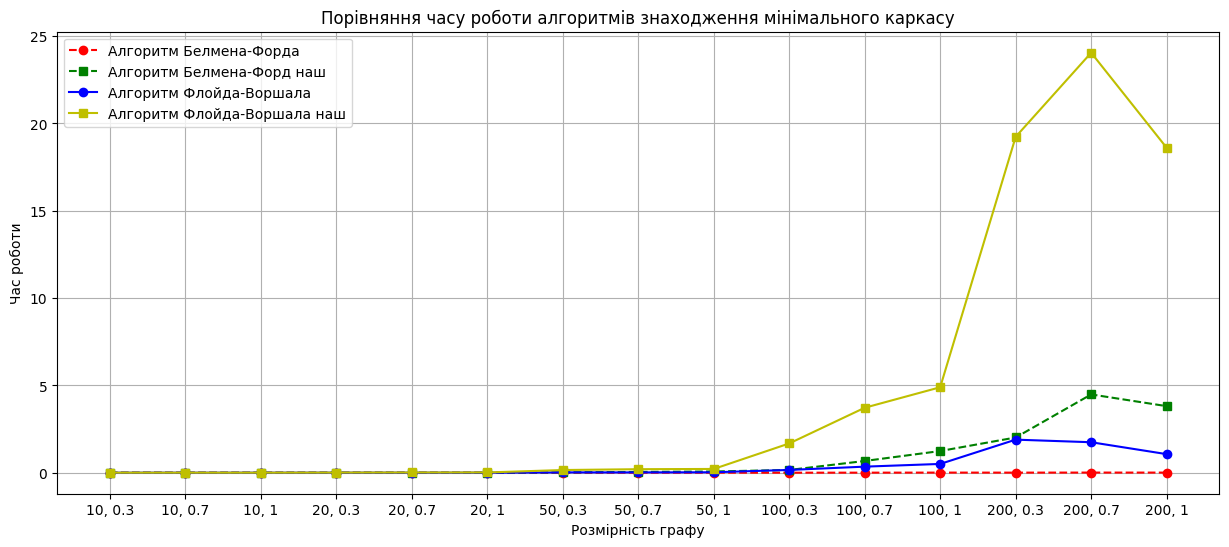

In [28]:
graph_sizes = ['10, 0.3', '10, 0.7', '10, 1', '20, 0.3', '20, 0.7', '20, 1', '50, 0.3', '50, 0.7', '50, 1', '100, 0.3', '100, 0.7', '100, 1', '200, 0.3', '200, 0.7', '200, 1']

time_bellman_ford = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018622875213623047, 0.0012682199478149414, 0.0014104843139648438, 0.0033634662628173827, 0.007087135314941406, 0.005249333381652832, 0.008532071113586425, 0.0072617769241333004]
time_bellman_ford_our = [0.0007905006408691406, 0.0006521224975585937, 0.00022451877593994142, 0.0015857219696044922, 0.0014809846878051757, 0.0, 0.020696234703063966, 0.04699692726135254, 0.07062702178955078, 0.15735390186309814, 0.67201669216156, 1.2413896560668944, 2.016827845573425, 4.482198739051819, 3.8108800649642944]
time_floyd_warshal = [0.0004032135009765625, 0.0, 0.0, 0.0015225648880004884, 0.0010645151138305663, 0.0008591413497924805, 0.01857161521911621, 0.0185621976852417, 0.025537800788879395, 0.15982916355133056, 0.34769606590270996, 0.5030029773712158, 1.8934397220611572, 1.745340609550476, 1.0636499404907227]
time_floyd_warshal_our = [0.0021316051483154298, 0.002402997016906738, 0.001980876922607422, 0.007595276832580567, 0.012762832641601562, 0.01565685272216797, 0.15394270420074463, 0.20184650421142578, 0.21584727764129638, 1.675769567489624, 3.7196067333221436, 4.892833399772644, 19.228422617912294, 24.04262216091156, 18.601427173614503]

plt.figure(figsize=(15, 6))

plt.plot(graph_sizes, time_bellman_ford, label='Алгоритм Белмена-Форда', marker='o', linestyle='--', color='r')
plt.plot(graph_sizes, time_bellman_ford_our, label='Алгоритм Белмена-Форд наш', marker='s', linestyle='--', color='g')
plt.plot(graph_sizes, time_floyd_warshal, label='Алгоритм Флойда-Воршала', marker='o', linestyle='-', color='b')
plt.plot(graph_sizes, time_floyd_warshal_our, label='Алгоритм Флойда-Воршала наш', marker='s', linestyle='-', color='y')

plt.title('Порівняння часу роботи алгоритмів знаходження мінімального каркасу')
plt.xlabel('Розмірність графу')
plt.ylabel('Час роботи')

plt.legend(loc='upper left')
plt.grid(True)

plt.show()

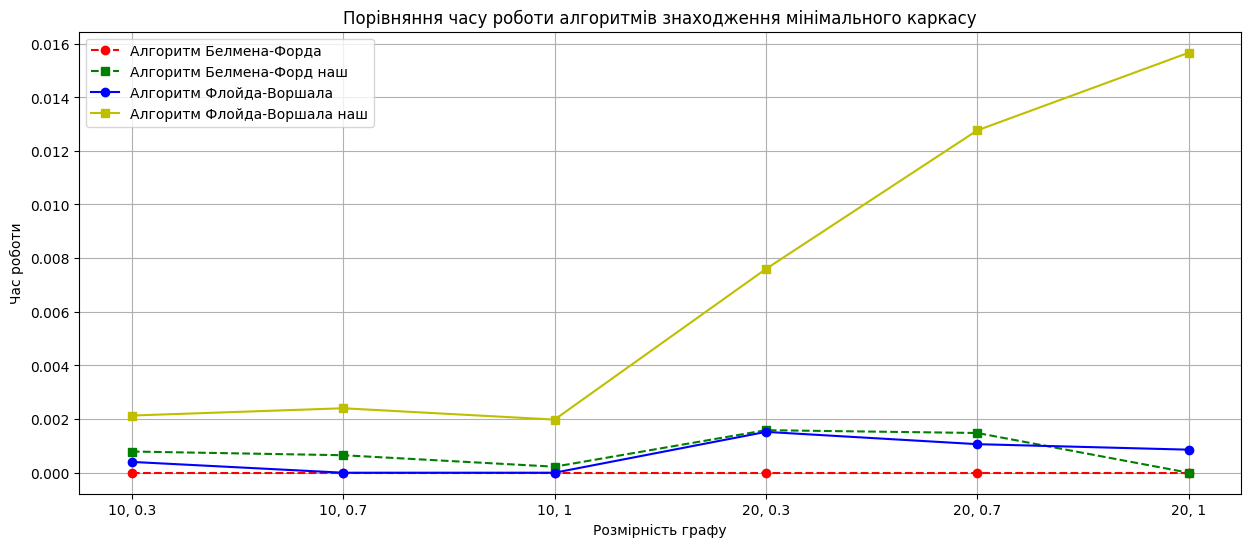

In [29]:
graph_sizes = ['10, 0.3', '10, 0.7', '10, 1', '20, 0.3', '20, 0.7', '20, 1', '50, 0.3', '50, 0.7', '50, 1', '100, 0.3', '100, 0.7', '100, 1', '200, 0.3', '200, 0.7', '200, 1'][:6]

time_bellman_ford = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018622875213623047, 0.0012682199478149414, 0.0014104843139648438, 0.0033634662628173827, 0.007087135314941406, 0.005249333381652832, 0.008532071113586425, 0.0072617769241333004][:6]
time_bellman_ford_our = [0.0007905006408691406, 0.0006521224975585937, 0.00022451877593994142, 0.0015857219696044922, 0.0014809846878051757, 0.0, 0.020696234703063966, 0.04699692726135254, 0.07062702178955078, 0.15735390186309814, 0.67201669216156, 1.2413896560668944, 2.016827845573425, 4.482198739051819, 3.8108800649642944][:6]
time_floyd_warshal = [0.0004032135009765625, 0.0, 0.0, 0.0015225648880004884, 0.0010645151138305663, 0.0008591413497924805, 0.01857161521911621, 0.0185621976852417, 0.025537800788879395, 0.15982916355133056, 0.34769606590270996, 0.5030029773712158, 1.8934397220611572, 1.745340609550476, 1.0636499404907227][:6]
time_floyd_warshal_our = [0.0021316051483154298, 0.002402997016906738, 0.001980876922607422, 0.007595276832580567, 0.012762832641601562, 0.01565685272216797, 0.15394270420074463, 0.20184650421142578, 0.21584727764129638, 1.675769567489624, 3.7196067333221436, 4.892833399772644, 19.228422617912294, 24.04262216091156, 18.601427173614503][:6]

plt.figure(figsize=(15, 6))

plt.plot(graph_sizes, time_bellman_ford, label='Алгоритм Белмена-Форда', marker='o', linestyle='--', color='r')
plt.plot(graph_sizes, time_bellman_ford_our, label='Алгоритм Белмена-Форд наш', marker='s', linestyle='--', color='g')
plt.plot(graph_sizes, time_floyd_warshal, label='Алгоритм Флойда-Воршала', marker='o', linestyle='-', color='b')
plt.plot(graph_sizes, time_floyd_warshal_our, label='Алгоритм Флойда-Воршала наш', marker='s', linestyle='-', color='y')

plt.title('Порівняння часу роботи алгоритмів знаходження мінімального каркасу')
plt.xlabel('Розмірність графу')
plt.ylabel('Час роботи')

plt.legend(loc='upper left')
plt.grid(True)

plt.show()

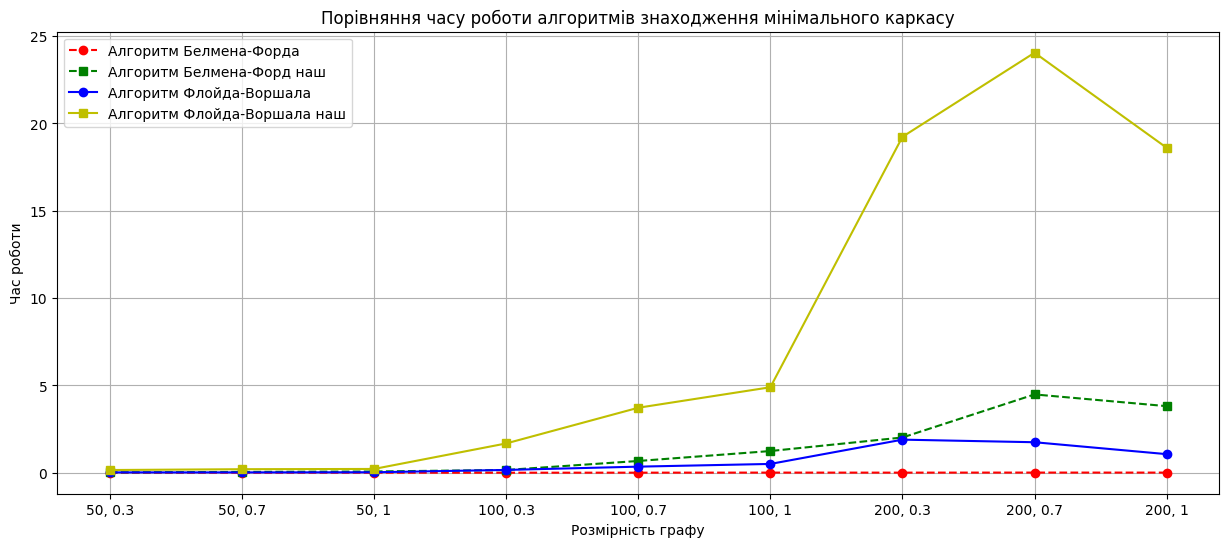

In [30]:
graph_sizes = ['10, 0.3', '10, 0.7', '10, 1', '20, 0.3', '20, 0.7', '20, 1', '50, 0.3', '50, 0.7', '50, 1', '100, 0.3', '100, 0.7', '100, 1', '200, 0.3', '200, 0.7', '200, 1'][6:]

time_bellman_ford = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018622875213623047, 0.0012682199478149414, 0.0014104843139648438, 0.0033634662628173827, 0.007087135314941406, 0.005249333381652832, 0.008532071113586425, 0.0072617769241333004][6:]
time_bellman_ford_our = [0.0007905006408691406, 0.0006521224975585937, 0.00022451877593994142, 0.0015857219696044922, 0.0014809846878051757, 0.0, 0.020696234703063966, 0.04699692726135254, 0.07062702178955078, 0.15735390186309814, 0.67201669216156, 1.2413896560668944, 2.016827845573425, 4.482198739051819, 3.8108800649642944][6:]
time_floyd_warshal = [0.0004032135009765625, 0.0, 0.0, 0.0015225648880004884, 0.0010645151138305663, 0.0008591413497924805, 0.01857161521911621, 0.0185621976852417, 0.025537800788879395, 0.15982916355133056, 0.34769606590270996, 0.5030029773712158, 1.8934397220611572, 1.745340609550476, 1.0636499404907227][6:]
time_floyd_warshal_our = [0.0021316051483154298, 0.002402997016906738, 0.001980876922607422, 0.007595276832580567, 0.012762832641601562, 0.01565685272216797, 0.15394270420074463, 0.20184650421142578, 0.21584727764129638, 1.675769567489624, 3.7196067333221436, 4.892833399772644, 19.228422617912294, 24.04262216091156, 18.601427173614503][6:]

plt.figure(figsize=(15, 6))

plt.plot(graph_sizes, time_bellman_ford, label='Алгоритм Белмена-Форда', marker='o', linestyle='--', color='r')
plt.plot(graph_sizes, time_bellman_ford_our, label='Алгоритм Белмена-Форд наш', marker='s', linestyle='--', color='g')
plt.plot(graph_sizes, time_floyd_warshal, label='Алгоритм Флойда-Воршала', marker='o', linestyle='-', color='b')
plt.plot(graph_sizes, time_floyd_warshal_our, label='Алгоритм Флойда-Воршала наш', marker='s', linestyle='-', color='y')

plt.title('Порівняння часу роботи алгоритмів знаходження мінімального каркасу')
plt.xlabel('Розмірність графу')
plt.ylabel('Час роботи')

plt.legend(loc='upper left')
plt.grid(True)

plt.show()